In [1]:
# Bar chart used for comparison
# Stacked bar chart used for comparison and composition
# pie chart used for composition

## Visualization  Basics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

### Composition Plot

#### Pie plot

In [19]:
languages = ['C', 'C++', 'Java', 'Python', 'R']
students = [23, 17, 29, 35, 12]
explode = [0, 0, 0, 0, 0]

In [24]:
np.argmax(students), np.max(students)
explode[np.argmax(students)] = 0.1

Text(0.5, 1.0, 'Student Distribution by Language Popularity')

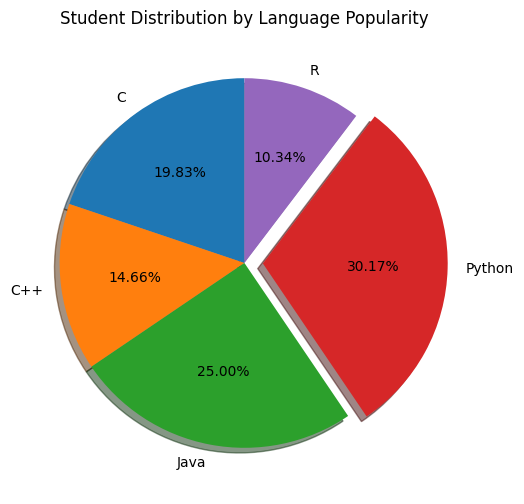

In [26]:
plt.pie(students, labels=languages, autopct="%0.2f%%", startangle=90, explode=explode, shadow=True)
plt.title('Student Distribution by Language Popularity')

#### Stacked bar chart

In [27]:
countries = ['USA', 'Canada', 'Russia', 'China', 'Nepal']
bronzes = np.array([38, 17, 26, 19, 20])
silvers = np.array([37, 23, 18, 18, 14])
golds = np.array([46, 27, 26, 19, 21])

Text(0, 0.5, 'Medals')

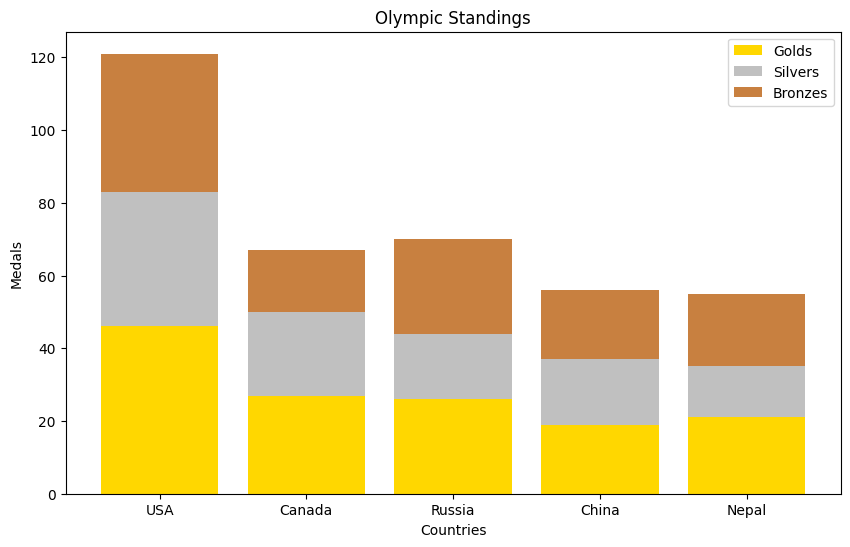

In [39]:
plt.bar(countries, 
        golds, 
        color='gold',
        label='Golds')

plt.bar(countries, 
        silvers, 
        color='silver',
        label='Silvers',
        bottom=golds)

plt.bar(countries, 
        bronzes, 
        color='#C88040',
        label='Bronzes',
        bottom=golds+silvers)

plt.legend()
plt.title('Olympic Standings')
plt.xlabel('Countries')
plt.ylabel('Medals')

#### Stacked area chart

Text(0, 0.5, 'Medals')

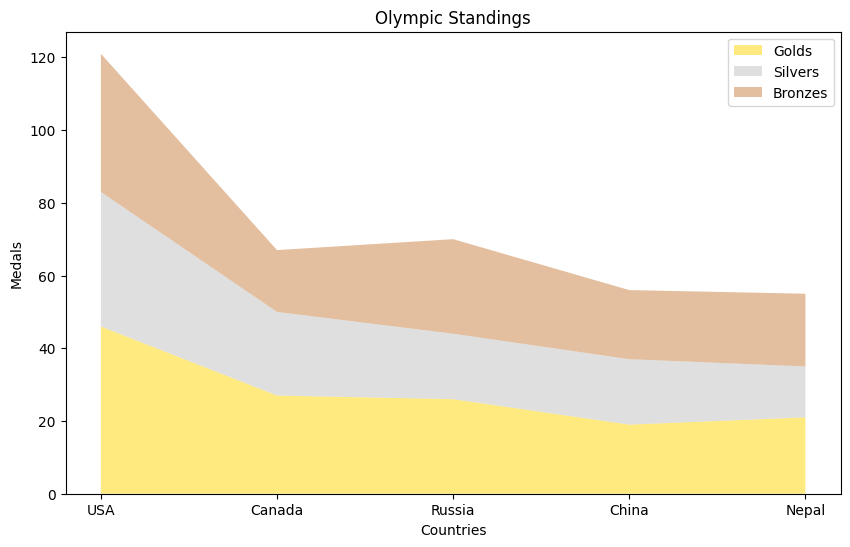

In [42]:
plt.stackplot(countries,
        golds, 
        silvers, 
        bronzes,
        alpha=0.5,
        labels=['Golds', 'Silvers', 'Bronzes'],
        colors=['gold', 'silver', '#C88040'])

plt.legend()
plt.title('Olympic Standings')
plt.xlabel('Countries')
plt.ylabel('Medals')

#### Venn Diagram

In [43]:
!pip install matplotlib_venn

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32155 sha256=56df69f43a92816c693376fdeb0a7b589c98bf068109eebd6786bbbed1ea960f
  Stored in directory: /Users/sunilthapa/Library/Caches/pip/wheels/32/41/5f/d0f29cd092d042d8e8a87d7bbe42193166aa555ff38b377343
Successfully built matplotlib-venn


In [53]:
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles

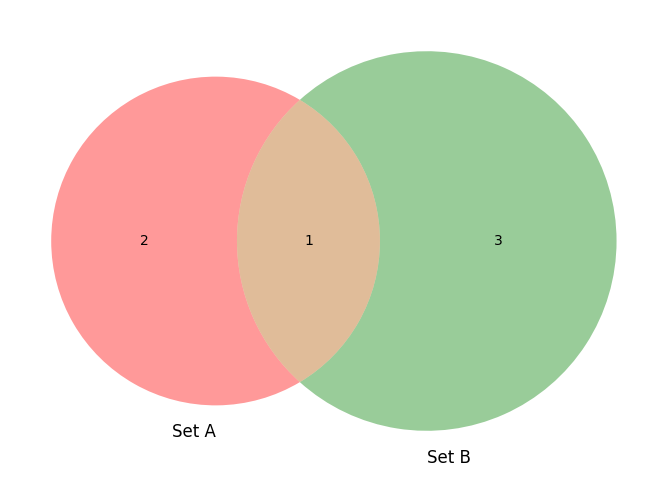

In [46]:
# venn2(subsets=(A, B, A⋂B))
venn2(subsets=(2, 3, 1),
    set_labels=('Set A', 'Set B'))

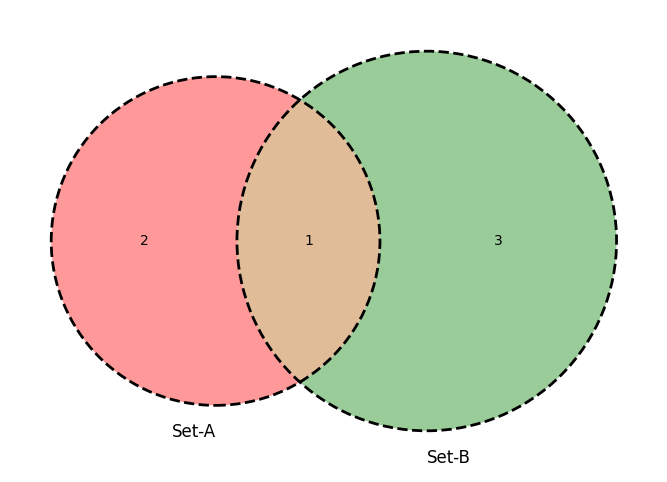

In [52]:
ratio = [2, 3, 1]
labels = ['Set-A', 'Set-B']
venn2(subsets=ratio,
    set_labels=labels)

venn2_circles(subsets=ratio,
            linestyle='--') # linestyle='dashed'

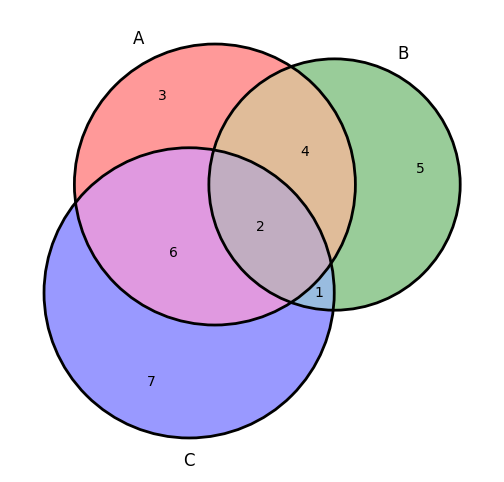

In [56]:
# venn3(subsets(A, B, A∩B, C, A∩C, B∩C, A∩B∩C))
mylist = [3, 5, 4, 7, 6, 1, 2]
venn3(subsets=mylist)

venn3_circles(subsets=mylist)

{'10': 0,
 '01': 1,
 '11': 2,
 '100': 0,
 '010': 1,
 '110': 2,
 '001': 3,
 '101': 4,
 '011': 5,
 '111': 6,
 'A': 0,
 'B': 1,
 'C': 2}

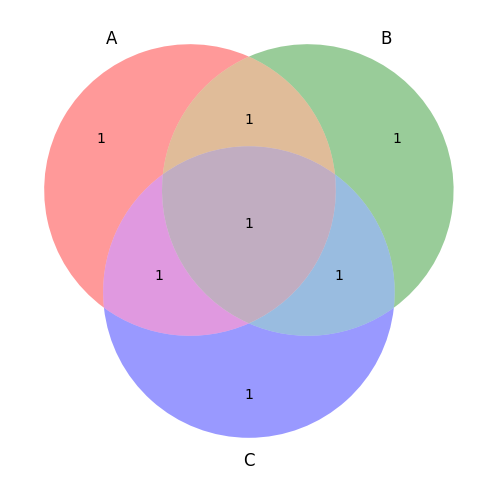

In [58]:
values = [1, 1, 1 ,1, 1, 1, 1]
v = venn3(values)
v.id2idx

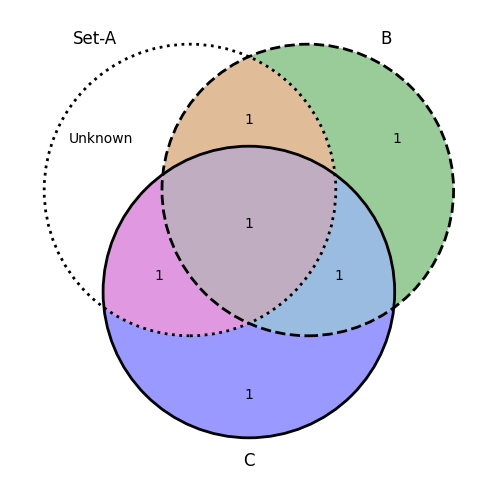

In [68]:
v = venn3(values)
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('A').set_text('Set-A')
v.get_label_by_id('100').set_text('Unknown')

c = venn3_circles(values)
c[0].set_ls('dotted')
c[1].set_ls('dashed')


#### Radar Plot

In [69]:
df = pd.DataFrame({
    'players': ['messi', 'ronaldo', 'neymar', 'mbappe'],
    'marking': [38, 25, 45, 42],
    'tackling': [35, 30, 40, 38],
    'passing': [49, 38, 43, 41],
    'shooting': [45, 48, 42, 46],
    'fitness': [39, 38, 42, 46]
})
df

,players,marking,tackling,passing,shooting,fitness
0,messi,38,35,49,45,39
1,ronaldo,25,30,38,48,38
2,neymar,45,40,43,42,42
3,mbappe,42,38,41,46,46


In [70]:
df.columns

Index(['players', 'marking', 'tackling', 'passing', 'shooting', 'fitness'], dtype='object')

In [74]:
features = list(df.columns[1:])
N = len(features)
features, N

(['marking', 'tackling', 'passing', 'shooting', 'fitness'], 5)

In [80]:
values = df.loc[0].drop('players').values.tolist()
values

[38, 35, 49, 45, 39]

In [81]:
values += values[:1]
values

[38, 35, 49, 45, 39, 38]

In [83]:
from math import pi
angles = [(n/float(N))*2*pi for n in range(N)]
angles += angles[:1]
angles

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669,
 0.0]

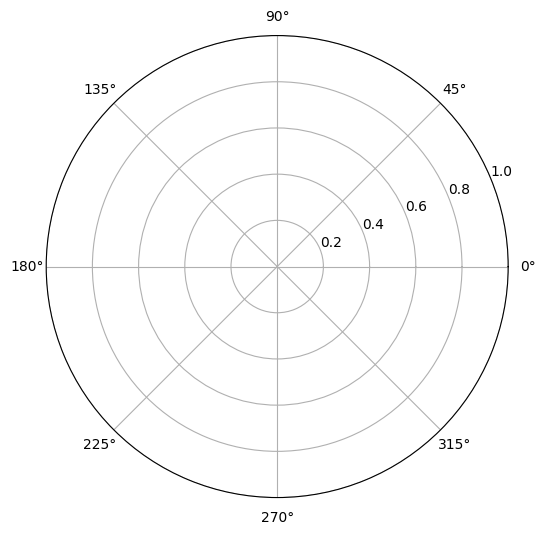

In [84]:
ax = plt.subplot(111, polar=True)


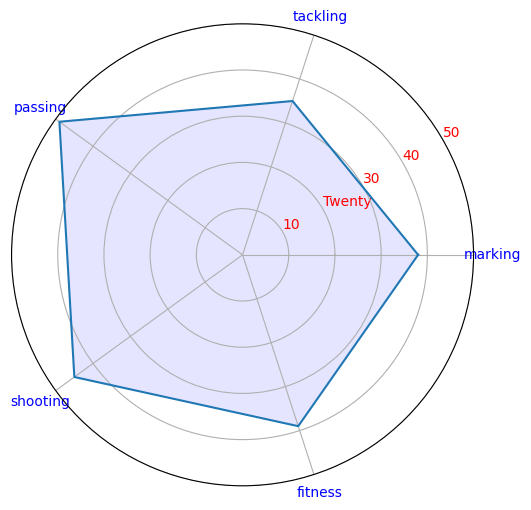

In [97]:
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], features, color='b')
plt.yticks([10, 20, 30, 40, 50], ['10', 'Twenty', '30', '40', '50'], color='r')
ax.set_rlabel_position(30)
plt.ylim(0, 50)
ax.plot(angles, values)
ax.fill(angles, values, 'b', alpha=0.1)

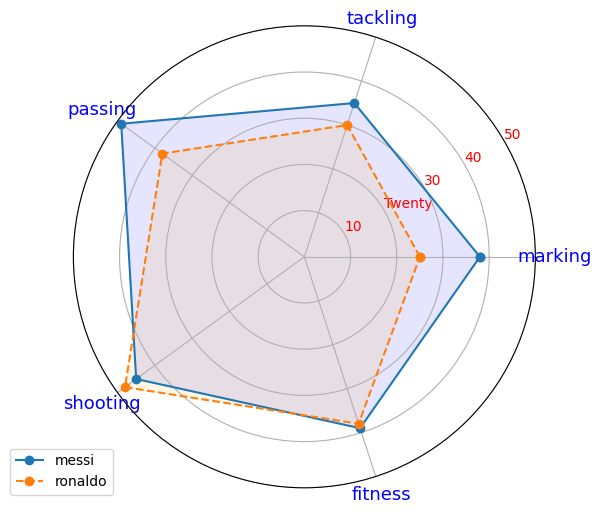

In [103]:
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], features, color='b', size=13)
plt.yticks([10, 20, 30, 40, 50], ['10', 'Twenty', '30', '40', '50'], color='r')
ax.set_rlabel_position(30)
plt.ylim(0, 50)

# Messi [id=0]
id = 0
values = df.loc[id].drop('players').values.tolist()
values += values[:1]
ax.plot(angles, values, 'o-', label=str(df['players'][id]))
ax.fill(angles, values, 'b', alpha=0.1)

# Ronaldo [id=1]
id = 1
values = df.loc[id].drop('players').values.tolist()
values += values[:1]
ax.plot(angles, values, 'o--', label=str(df['players'][id]))
ax.fill(angles, values, 'orange', alpha=0.1)

plt.legend(bbox_to_anchor=(0.1, 0.1))